In [1]:
import numpy as np
import matplotlib.pylab as plt
import healpy as hp
from lsst.sims.featureScheduler.modelObservatory import Model_observatory
from lsst.sims.featureScheduler.schedulers import Core_scheduler
from lsst.sims.featureScheduler.utils import standard_goals, calc_norm_factor, schema_converter
import lsst.sims.featureScheduler.basis_functions as bf
from lsst.sims.featureScheduler.surveys import (generate_dd_surveys, Greedy_survey,
                                                Blob_survey, Pairs_survey_scripted)
from lsst.sims.utils import (_hpid2RaDec, _raDec2Hpid)

In [2]:
# Load up observations
nside=32
# Load observations back into an array
sco = schema_converter()
observations = sco.opsim2obs('templates_w3.0_10yrs.db')


In [3]:
# Create the scheduler object
from templates import generate_blobs, gen_greedy_surveys
nexp=1
template_weight = 3
greedy = gen_greedy_surveys(nside, nexp=nexp)
ddfs = generate_dd_surveys(nside=nside, nexp=nexp)
blobs = generate_blobs(nside, nexp=nexp, mixed_pairs=True, template_weight=template_weight)
surveys = [ddfs, blobs, greedy]
scheduler = Core_scheduler(surveys, nside=nside)

In [4]:
np.where((observations['night'] > 755) & (observations['note'] != ''))

(array([ 438969,  438970,  438971, ..., 2192090, 2192091, 2192092]),)

In [5]:
observations[438969]['note']

'blob, y'

In [6]:
# replay observations back into the scheduler
for obs in observations[0:438969]:
    scheduler.add_observation(obs)

In [7]:
# Set up the observatory, so we can get the current conditions. Takes a minute because it has to load large sky file
observatory = Model_observatory(nside=nside)
observatory.mjd = obs['mjd']
# Observatory starts parked, so need to send an expose command to slew to the correct position
temp = observatory.observe(obs)
# It took some time to make that slew, so reset the time again
observatory.mjd = obs['mjd']

In [8]:
conditions = observatory.return_conditions()

/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/modelObservatory/model_observatory.py:473: RuntimeWarning: invalid value encountered in less
  slewtimes[np.where(slewtimes < 0)] = np.nan


In [9]:
scheduler.survey_lists

[[<lsst.sims.featureScheduler.surveys.dd_surveys.Deep_drilling_survey at 0x7f8dea6ef1d0>,

In [10]:
scheduler.survey_lists[1][2]

/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


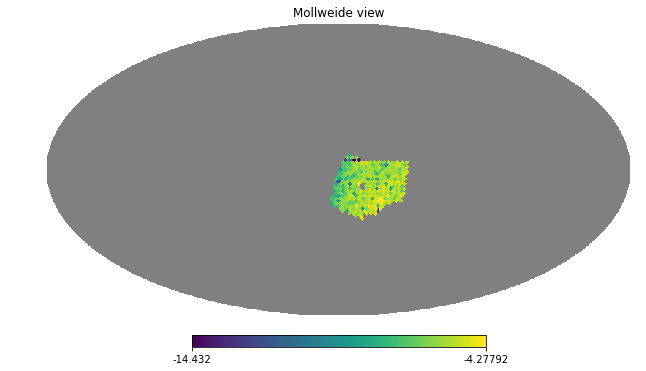

In [11]:
hp.mollview(scheduler.survey_lists[1][2].calc_reward_function(conditions))

/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


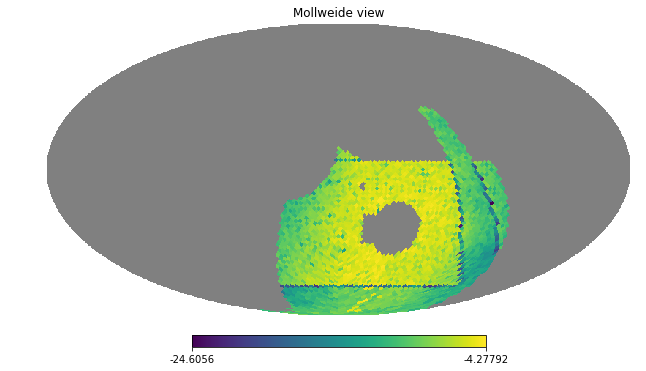

In [12]:
# Let's go ahead and remove the az cropping
scheduler.survey_lists[1][2].az_range=2.*np.pi
scheduler.survey_lists[1][2].search_radius = np.pi
hp.mollview(scheduler.survey_lists[1][2].calc_reward_function(conditions))   

In [13]:
scheduler.survey_lists[1][2].basis_functions

i


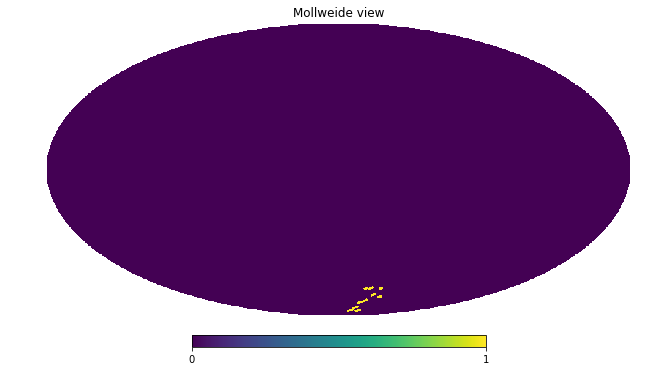

In [14]:
hp.mollview(scheduler.survey_lists[1][2].basis_functions[7](conditions))
print(scheduler.survey_lists[1][2].basis_functions[7].filtername)

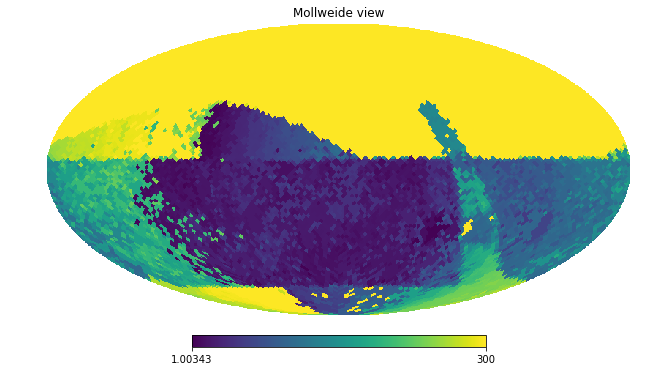

In [15]:
hp.mollview(conditions.mjd-scheduler.survey_lists[1][2].basis_functions[7].survey_features['last_n_mjds'].feature[0,:], max=300)

/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


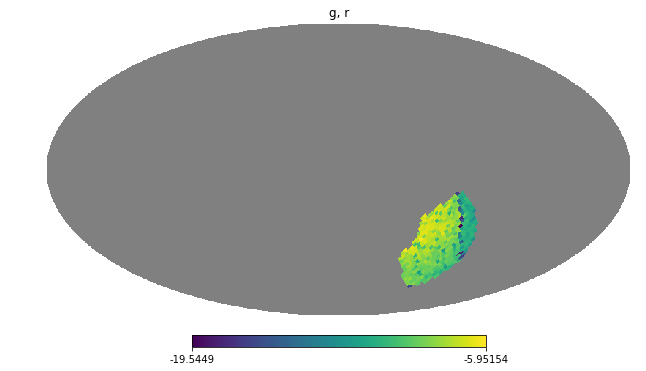

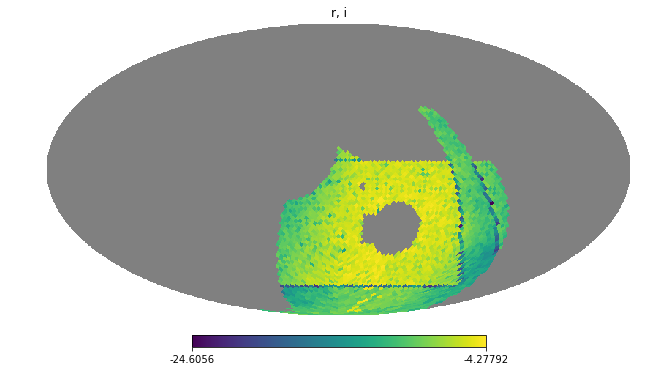

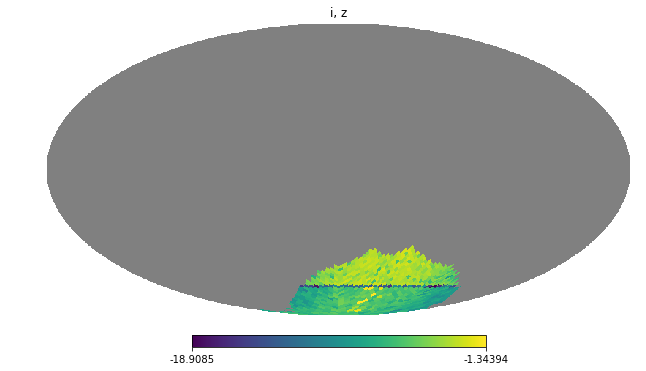

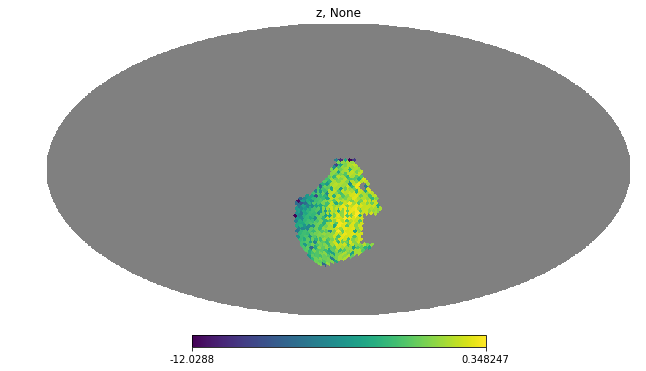

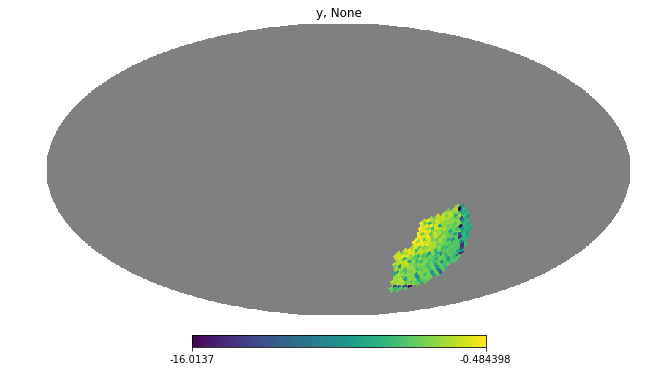

In [18]:
for survey in scheduler.survey_lists[1]:
    reward = survey.calc_reward_function(conditions)
    if np.size(reward) > 1:
        hp.mollview(reward, title='%s, %s'% (survey.filtername1, survey.filtername2))

So it looks like the feature and basis function are working properly, they just don't have enough weight to force observations to get done.